Digit Classification Project with MNIST dataset
The MNIST data set contains 60,000 training images and 10,000 test images.

In [ ]:
#Reference: 
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com

In [ ]:
#Importing tensorflow alongwith other dependencies
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     |████████████████████████████████| 2.1MB 4.6MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=3f67ef586b6f17da1dcb10fe6613685f06e7f17a5abb78b13c32d86339025d26
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [ ]:
#downloading and loading the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


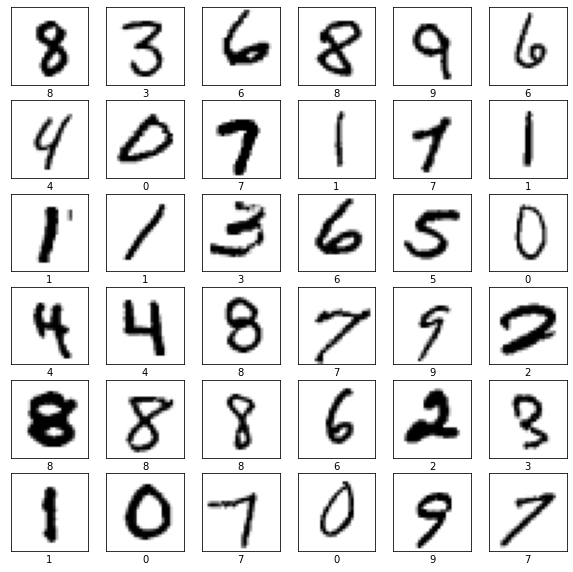

In [ ]:
#the dataset contains 28x28 grayscale  images of handwritten digits
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
#defining simple neural network using keras API and sequential class

def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      #Defining the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      # tf.keras.layers.Dense(128, activation= '''TODO'''),

      #Defining the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
      # [Dense layer to output classification probabilities]
      
  ])
  return fc_model

model = build_fc_model()

In [ ]:
#experimenting with both optimiter and learning rates
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#defining the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3659 - accuracy: 0.8991
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1980 - accuracy: 0.9419
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1499 - accuracy: 0.9571
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1206 - accuracy: 0.9660
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1016 - accuracy: 0.9708


In [ ]:
#testing the model with evaluate method
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9686
Test accuracy: 0.9685999751091003


In [ ]:
#defining a cnn model and will use same training and test dataset to get more accuracy
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        #Defining the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        #Defining the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        #Definingthe second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        #Defining the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        #Defining the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initializing the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
#Defining the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Using model.fit to train the CNN model, with the same batch_size and number of epochs previously used
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1768 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0523 - accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0219 - accuracy: 0.9928


In [ ]:
#Using the evaluate method to test the model!
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


In [ ]:
#making prediction with cnn model
predictions = cnn_model.predict(test_images)
predictions[0]

array([7.8490849e-09, 1.9111082e-08, 2.0510269e-07, 1.2930171e-04,
       1.2461083e-08, 4.0178708e-08, 2.7993853e-14, 9.9986982e-01,
       4.8400915e-07, 8.0382748e-08], dtype=float32)

7
Label of this digit is: 7


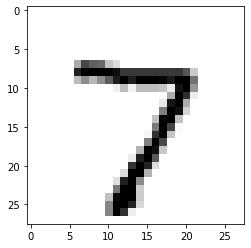

In [ ]:
#identify the digit with the highest confidence prediction for the first image in the test dataset.
prediction = np.argmax(predictions[0]) 

print(prediction)

print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

In [ ]:
#plot images from the test dataset along with their predicted label,
# as well as a histogram that provides the prediction probabilities for each of the digits
image_index = 81 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

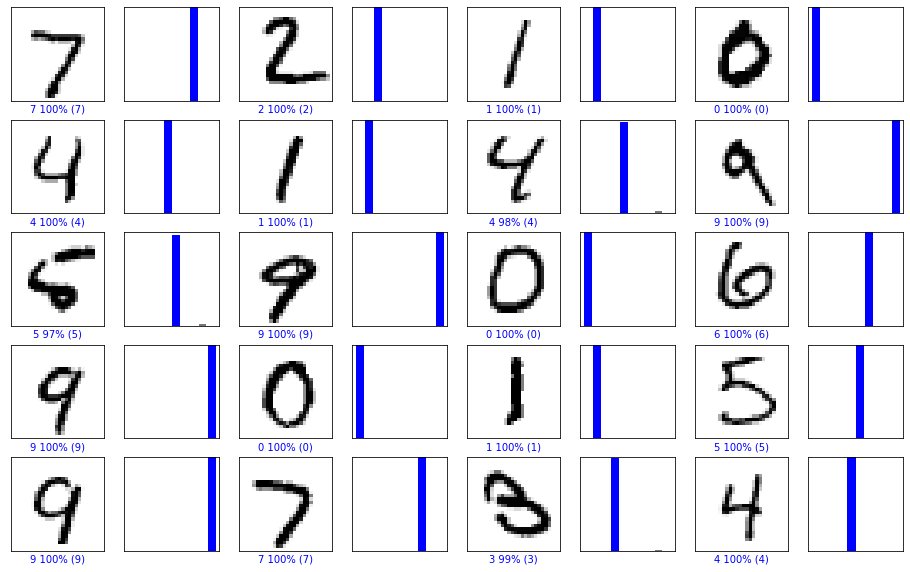

In [ ]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

Reference
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com